# Lecture 11: Unsupervised learning

In our previous lectures on regression + regularization, we focused on *supervised learning*, where we predict some target variable $y$ from features $X$. The following tasks are examples of supervised learning: 

- Use a multivariate linear regression to predict a Census tract's COVID case rate ($y$) from its population density, mask-wearing rate, etc ($X$)
- Train a regularized classification model to predict whether someone's cancer will metastasize ($y$), given their medical history ($X$)

Today we will talk about *unsupervised learning*, which attacks a fundamentally different problem: don't try to predict $y$, just find patterns in $X$. The following are examples of unsupervised learning tasks: 

- Given a dataset of voters and how they respond to a survey of their political views ($X$), cluster voters into groups who hold similar political views. 
- Given 100 indicators of a country's well-being (X) like average happiness, life expectancy, per-capita GDP, etc define a smaller set of summary measures that capture most of the variance in the original measures: ie, an "aggregate well-being index". 

The first task is an example of *clustering*, the second of *dimensionality reduction*. Both are unsupervised learning techniques used to find patterns in complex datasets. 

More formally, unsupervised learning is interested in characterizing the density $p(X)$. Does it fall into clusters (cluster analysis)? Does it lie on a low-dimensional manifold (dimensionality reduction)? 

Unsupervised learning is hard for at least two reasons! First, the density $p(X)$ is often high-dimensional and difficult to visualize or describe (can you see in 100 dimensions? I can only see in 8). Second, whether a description is "good" is often a bit subjective. In supervised learning, we have standard and accepted metrics of how well we predict $y$ from $X$. But in unsupervised learning, you often end up saying things which are mathematical versions of "this distribution is 3 big blobby things and then another little blobby thing over here" which can be difficult to formally confirm or refute. This leads to lots of [fun Twitter arguments](https://twitter.com/lpachter/status/1431325969411821572?lang=en) involving nerds saying "my 43 pages of equations prove that your blobby things are bad summaries of the original blobby things!" 



## Clustering

The goal of cluster analysis is to divide the data into similar clusters. There are many many ways to do this but today we will focus on one of the simplest, most intuitive, and most common algorithms - *k-means*. 

Side note - I have a soft spot for k-means because it was actually one of the first algorithms I learned as a physics major and I thought it was pretty magical - it was one of the things which convinced me to study ML. 

Here's how k-means works: 

1. Start by randomly generating a set of $k$ cluster centers. 
2. Assign each datapoint to the closest cluster center, as measured by squared distance. 
3. Recompute the cluster centers: each cluster center is the mean of the datapoints assigned to it. Repeat steps 2 + 3 until convergence. 

This is very simple and very intuitive! We can see an example of it in action in Figure 1 [here](https://cs229.stanford.edu/notes2021fall/cs229-notes7a.pdf). 

Note that k-means is not guaranteed to yield the globally optimal solution (ie, the assignment of points to cluster centers which minimizes the sum of squared distances between each point and the cluster center). One way to find that would be to search over all possible assignments of $N$ points to $k$ cluster centers. But this gets big very fast for realistic $N$ and $k$, so is not practical. The k-means algorithm is much more practical; one compromise that people often use is to randomly initialize the algorithm many times, and take the run which yields the best solution. scikit-learn does this by default, and you can bump up the number of initializations using the `n_init` argument.  


Fitting k-means is straight-forward with scikit-learn. 

Text(0.5, 1.0, 'K-means with three clusters')

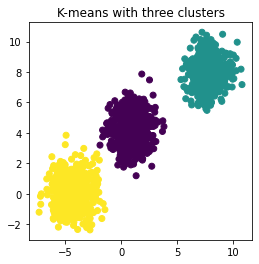

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(4, 4))

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=3)
y_pred = KMeans(n_clusters=3).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("K-means with three clusters")

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

When we divide the columns' mean by the standard deviation, we normalize the data. This is important because after normalization, we can use the data without to have an understanding of the underlying scale. For example; the range between the youngest and oldest age is a different scale than the smallest or largest state ID. Since communicating relation is important in this excersice we have to set every number on the same scale. By setting every number on the same scale, we can later apply data science techniques such as k-means or PCA.

We see that the standard deviation of columns vary much at `subcty_exp_pc` (~ 1608) and `reimb_penroll_adj10` (~ 1459). Other columns are close to zero or not higher than 9. 

The following (modified) example from the [sklearn documentation](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_assumptions.html#sphx-glr-auto-examples-cluster-plot-kmeans-assumptions-py) also demonstrates some of the ways in which k-means can go wrong.                                                     

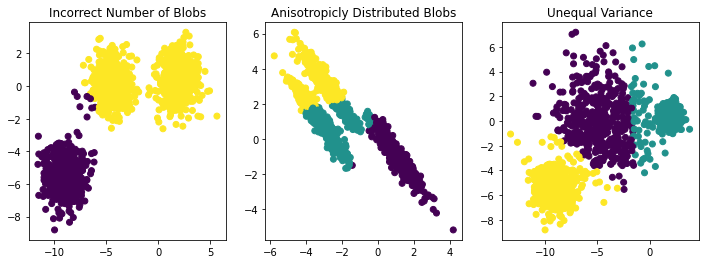

In [2]:
# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 4))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)

plt.subplot(131)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

# Anisotropicly distributed data
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_aniso)

plt.subplot(132)
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y_pred)
plt.title("Anisotropicly Distributed Blobs")

# Different variance
X_varied, y_varied = make_blobs(n_samples=n_samples,
                                cluster_std=[1.0, 2.5, 0.5],
                                random_state=random_state)
y_pred = KMeans(n_clusters=3, random_state=random_state).fit_predict(X_varied)

plt.subplot(133)
plt.scatter(X_varied[:, 0], X_varied[:, 1], c=y_pred)
plt.title("Unequal Variance")

plt.show()

A basic question: how do we actually choose the number of clusters? In some cases, like the examples above, it's visually obvious, but often it isn't. It's also not obvious how to choose the number of clusters using error on a validation set, as we'd do for supervised learning, because that will tend to just drop. 

This is related to the "how many blobby things" problem above and as such is somewhat subjective. One thing people often do is try varying numbers of clusters, plot the sum of squared distances to cluster centers, and choose the number where it stops decreasing sharply (the kink in the curve). Visual inspection can also be useful. Sometimes the problem itself suggests a number of clusters. Finally, there are also more formal statistics, like the gap statistic, which have been proposed. See [Elements of Statistical Learning](https://web.stanford.edu/~hastie/Papers/ESLII.pdf), Section 14.3.11, for a fuller discussion. 

From the sklearn documentation, we can extract the sum of squared distances of samples to their closest cluster center using the `inertia_` value of the fitted model. Let's plot this for various numbers of clusters on test data. 

In [3]:
# confirm that inertia is doing what we think it's doing on 1D data. 
X = np.random.random([500,1])
model = KMeans(n_clusters=1, random_state=random_state)
model.fit(X)
print(model.inertia_)
center = X.mean()
print(((X - center) ** 2).sum())


39.84712622845435
39.84712622845434


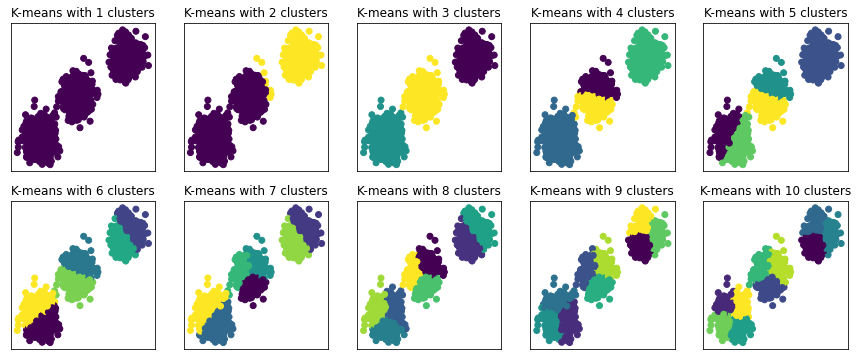

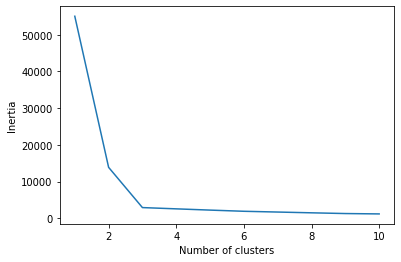

In [4]:

n_samples = 1500
X, y = make_blobs(n_samples=n_samples, centers=3, random_state=3)

inertias = []
clusters_to_test = range(1, 11)

plt.figure(figsize=[15, 6])
for n_clusters in clusters_to_test:
    model = KMeans(n_clusters=n_clusters)
    y_pred = model.fit_predict(X)
    inertias.append(model.inertia_)
    plt.subplot(2, 5, n_clusters)
    plt.xticks([])
    plt.yticks([])

    
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("K-means with %i clusters" % n_clusters)
plt.show()
    
plt.figure()
plt.plot(clusters_to_test, inertias)
plt.xlabel("Number of clusters")
plt.ylabel("Inertia")
plt.show()
    

## Dimensionality reduction

Basic idea behind dimensionality reduction: sometimes a dataset appears to be very high-dimensional (ie, it has a ton of features), but it actually lies in a lower-dimensional space in that high-dimensional space. (You can call that lower-dimensional space a "manifold" if you want to be fancy, or a "hyperplane" if you want to be fancy and the manifold is flat). For example, the data might have three features, but all lie on a plane in the three dimensions. By representing the data in this lower-dimensional space, we can sometimes get a more succinct and interpretable summary of the data. Basically, it's a lot easier to visualize and think about 2-dimensional data than 30-dimensional data. 

### PCA

*Principal component analysis* (PCA), which is also sometimes referred to as *singular value decomposition* (SVD), is perhaps the most widely used dimensionality reduction technique. There are many, many ways to think of and justify PCA (see this excellent Twitter [thread](https://twitter.com/WomenInStat/status/1285610321747611653) for some of them, if you like linear algebra) but here we'll only talk about one of them: **PCA with k components finds the k-dimensional hyperplane which best fits the original high-dimensional data (in terms of minimizing squared-error reconstruction)**. We'll start by presenting this with only two dimensional simulated data and a single PC so we can visualize exactly what's happening. Just using two dimensions doesn't really suffice to fully explain what PCA is doing, though, so then we'll move to real high-dimensional data.

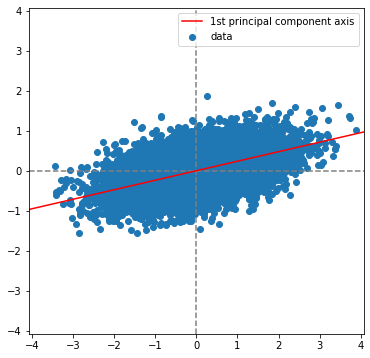

In [32]:
from sklearn.decomposition import PCA
# 2-dimensional original data, project down to one dimension

np.random.seed(42)

# generate fake data
X = np.random.multivariate_normal(mean=[0, 0], cov=[[1, 0.2], [0.2, 0.2]], size=10000)
max_val = np.max(np.abs(X)) * 1.05
for j in range(X.shape[1]):
    X[:, j] = X[:, j] - X[:, j].mean() # Center the data for simplicity
    
# compute PCs and plot the data. 
model = PCA(n_components=1)
model.fit(X)

plt.figure(figsize=[6, 6])
plt.scatter(X[:, 0], X[:, 1], label='data')
plt.xlim([-max_val, max_val])
plt.ylim([-max_val, max_val])

plt.plot([0, 0], [-max_val, max_val], color='grey', linestyle='--')
plt.plot([-max_val, max_val], [0, 0], color='grey', linestyle='--')


plt.plot([model.components_[0, 0] * -5, model.components_[0, 0] * 5], 
         [model.components_[0, 1] * -5, model.components_[0, 1] * 5], color='red', 
         label='1st principal component axis')



plt.legend()
plt.show()


We can also extract various useful things from the fitted PCA model. The *explained variance ratio* tells us how much of the variance in the data each PCA dimension (PC) explains; larger numbers mean that that dimension explains more variance in the data. If your number of PCs is equal to the number of dimensions in your data, the entries of explained variance ratio will sum to 1. Here, we see that the first dimension explains 88% of the variance in the data, which is a lot. Often in analysis, people will take enough PCs to explain a significant fraction of the variance in the data, and then stop looking at PCs after that. (How do we compute explained variance ratio? We start by computing the explained variance for each component - basically, the variance of the data when it's projected onto the axis for that component. Then, we divide the explained variance by its sum so it sums to 1.) 

We can get the directions of the PC axes using *model.components_* (the red line in the graph above, basically). 

Finally, we can get the projections of the data points onto those axes by using the model.transform() function. These projections are the representation of the data in its lower dimensional space; for example, if our original data has 500 rows and 30 features, and we compute 2 PCs, our transformed data given by model.transform will have 500 rows and 2 columns. So each 30-dimensional datapoint will have a 2-dimensional representation in the transformed space. 


In [30]:
# Extracting useful things from PCA
print("Proportion of variance explained by each component")
print(model.explained_variance_ratio_)

print("Model components")
print(model.components_) # each row is one component
print("Low dimensional projection of the data")
transformed_X = model.transform(X) # first column is projection of each point onto first component, second column onto second component, etc. 
print(transformed_X)

# make sure that explained variance is doing what we think it's doing
assert np.allclose(model.explained_variance_, transformed_X.std(ddof=1) ** 2)



Proportion of variance explained by each component
[0.8766109]
Model components
[[0.972922   0.23113369]]
Low dimensional projection of the data
[[-0.50470731]
 [-0.65828304]
 [ 0.24316075]
 ...
 [-0.97092908]
 [-1.40562192]
 [-1.75073726]]


In [7]:
# You can reconstruct X fully if you have N principal components, where N is the dimension of X (in this case, 2).
full_PCA = PCA(n_components=2)
full_PCA.fit(X)
assert(np.allclose(X - np.dot(full_PCA.transform(X), full_PCA.components_), 0)) # no reconstruction error
assert(np.allclose(full_PCA.explained_variance_ratio_.sum(), 1)) # variance in X is fully explained. 

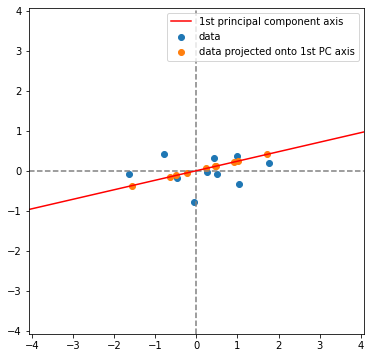

In [34]:
# Show reconstruction compared to original data

plt.figure(figsize=[6, 6])
plt.scatter(X[:10, 0], X[:10, 1], label='data')
plt.xlim([-max_val, max_val])
plt.ylim([-max_val, max_val])

plt.plot([0, 0], [-max_val, max_val], color='grey', linestyle='--')
plt.plot([-max_val, max_val], [0, 0], color='grey', linestyle='--')


plt.plot([model.components_[0, 0] * -5, model.components_[0, 0] * 5], 
         [model.components_[0, 1] * -5, model.components_[0, 1] * 5], color='red', 
         label='1st principal component axis')

# Take first 10 datapoints of X and project them onto the first component. 
# The projected points are the first column of transformed_X * the first component. 
# If we used both components, not just the first one, we would perfectly reconstruct X. 
data_projected_onto_first_component = np.dot(transformed_X[:10, 0].reshape(10, 1), 
                                       model.components_[0, :].reshape(1, 2))
plt.scatter(data_projected_onto_first_component[:, 0], 
            data_projected_onto_first_component[:, 1],  
            label='data projected onto 1st PC axis')


plt.legend()
plt.show()

## Applying PCA to real data

The above example was a bit contrived: only 2 dimensions and 1 principal component. Let's see an example on real data. We use the Wisconsin breast cancer dataset, which has "Features...computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image" as well as a target variable which describes whether or not the mass is malignant (0=malignant, 1=benign).


In [53]:
from sklearn import datasets
import pandas as pd

data, target = datasets.load_breast_cancer(return_X_y=True, as_frame=True)
print("Mean of target variable is")
print(target.mean())
data.head()

Mean of target variable is
0.6274165202108963


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


It looks like the data contains all continuous values and the [documentation](https://scikit-learn.org/stable/datasets/toy_dataset.html#breast-cancer-dataset) agrees. This is generally a good thing to check when applying PCA - you can apply it to categorical variables, but the plots can look a bit weird. 

In [10]:
assert pd.isnull(data).values.sum() == 0
data.nunique()


mean radius                456
mean texture               479
mean perimeter             522
mean area                  539
mean smoothness            474
mean compactness           537
mean concavity             537
mean concave points        542
mean symmetry              432
mean fractal dimension     499
radius error               540
texture error              519
perimeter error            533
area error                 528
smoothness error           547
compactness error          541
concavity error            533
concave points error       507
symmetry error             498
fractal dimension error    545
worst radius               457
worst texture              511
worst perimeter            514
worst area                 544
worst smoothness           411
worst compactness          529
worst concavity            539
worst concave points       492
worst symmetry             500
worst fractal dimension    535
dtype: int64

It is often a good idea to standardize the columns prior to applying PCA - ie, subtract the mean of each column and divide by its standard deviation. 

1. **Subtracting the mean** - some packages which apply PCA will assume the data matrix columns have zero mean, so it can be safer to do, and it also means that the data matrix can be written in terms of simple matrix multiplications, as shown above. 
2. **Dividing by the standard deviation** If the different columns have different levels of variation (eg, standard deviations), but you want PCA to prioritize representing each column equally, you need to standardize the columns, or PCA will devote most of its representational effort to the columns with larger amounts of variation. If, on the other hand, you think the level of variation of the columns are meaningful - for example, maybe you have some dataset of food preferences, and everyone says 10/10 for chocolate ice cream but vary a lot on how much they like cilantro, you might *not* want to standardize the columns, because you believe the amount of variation conveys meaningful information. 

In the case of the breast cancer dataset, we will both subtract the mean and divide by the standard deviation of each column, because we want PCA to prioritize representing each column equally and the original scales look quite different. 



In [11]:
data.std()

mean radius                  3.524049
mean texture                 4.301036
mean perimeter              24.298981
mean area                  351.914129
mean smoothness              0.014064
mean compactness             0.052813
mean concavity               0.079720
mean concave points          0.038803
mean symmetry                0.027414
mean fractal dimension       0.007060
radius error                 0.277313
texture error                0.551648
perimeter error              2.021855
area error                  45.491006
smoothness error             0.003003
compactness error            0.017908
concavity error              0.030186
concave points error         0.006170
symmetry error               0.008266
fractal dimension error      0.002646
worst radius                 4.833242
worst texture                6.146258
worst perimeter             33.602542
worst area                 569.356993
worst smoothness             0.022832
worst compactness            0.157336
worst concav

In [12]:
X = data.values.copy()
non_normalized_X = data.values.copy()
for j in range(X.shape[1]):
    non_normalized_X[:, j] = non_normalized_X[:, j] - non_normalized_X[:, j].mean()
    X[:, j] = (X[:, j] - X[:, j].mean()) / X[:, j].std()

In [13]:
# Now we compute all the PCs. 

model = PCA(n_components=X.shape[1])
model.fit(X)

PCA(n_components=30)

Looking at the proportion of variance explained, we can see that the first two components explain a lot of the variance (about 60%) so we'll start by looking at those. 

In [14]:
# examine fraction of variance explained by each component

model.explained_variance_ratio_

array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

We can plot the first two components of the data and color the points by the value of the "target" variable which comes with the dataset. We can see that these components, by themselves, give us a pretty good separation of benign and malignant tumors. The first PC especially separates the malignant/benign data quite well, suggesting that this representation is meaningful for an important trait we care about. 

Text(0, 0.5, 'Second PC')

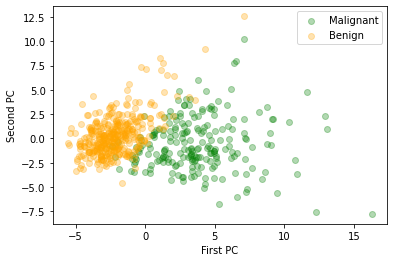

In [15]:
transformed_X = model.transform(X)

plt.scatter(transformed_X[target==0, 0], 
            transformed_X[target==0, 1], 
            color='green', 
            label='Malignant', 
            alpha=0.3)
plt.scatter(transformed_X[target==1, 0], 
            transformed_X[target==1, 1], 
            color='orange', 
            label='Benign', 
            alpha=0.3)
plt.legend()
plt.xlabel("First PC")
plt.ylabel("Second PC")


In [16]:
component_weights = pd.DataFrame({'PC 1':model.components_[0, :], 
                                 'PC 2':model.components_[1, :], 
                                 'features':data.columns}).sort_values(by='PC 1')[::-1]
max_val = np.abs(component_weights[['PC 1', 'PC 2']].values).max()
component_weights.style.background_gradient(cmap='bwr', vmin=-max_val, vmax=max_val)




,PC 1,PC 2,features
7,0.260854,-0.034768,mean concave points
6,0.258400,0.060165,mean concavity
27,0.250886,-0.008257,worst concave points
5,0.239285,0.151892,mean compactness
22,0.236640,-0.199878,worst perimeter
26,0.228768,0.097964,worst concavity
20,0.227997,-0.219866,worst radius
2,0.227537,-0.215181,mean perimeter
23,0.224871,-0.219352,worst area
3,0.220995,-0.231077,mean area


The signs of the first PC axis are all consistent (in this case, all positive) which tells us that the features in the data all tend to be positively correlated (think about why this is; it might be easiest to just imagine it in two or three dimensions). We can confirm this by looking at the correlations between the features. 

Text(0.5, 1.0, 'Correlations between the 30 original features')

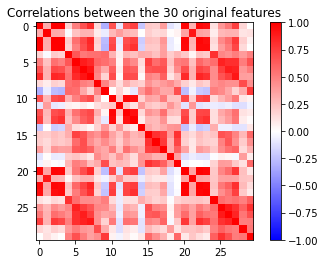

In [54]:
plt.imshow(np.corrcoef(data.transpose()), clim=[-1, 1], cmap='bwr')
plt.colorbar()
plt.title("Correlations between the 30 original features")

Sometimes when you look at the PC axes you'll see that they divide the data into groups of related features: for example, if you're looking at human body data, the first PC axis might end up correlated with a bunch of features to do with the liver, and the second axis might end up correlated with a bunch of features to do with the lungs. Or if you're looking at a survey of health and happiness across counties, the first PC might end up correlated with indicators of health, and the second with indicators of happiness. 

[Here's](https://www.nature.com/articles/nature07331) another famous examples of PCA being applied. The authors of this paper show that by applying PCA to people's genetic data and computing the first two PCs, you can actually reconstruct quite an accurate map of where people are from in Europe. This makes a striking map but also has very important implications for design of genetic studies (basically, if you fail to control for genetic ancestry you end up with lots of spurious associations).


As an illustration of why normalization is important, we'll take a quick look at what happens if we don't divide by X's standard deviation in each column. You can see that the two classes are less well-separated. 

Text(0, 0.5, 'Second PC')

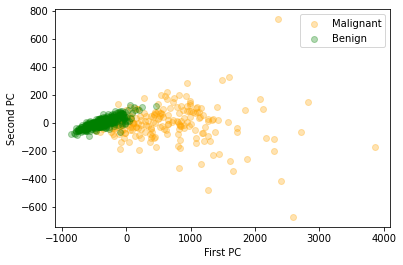

In [17]:

non_normalized_X
non_normalized_model = PCA(n_components=non_normalized_X.shape[1])
non_normalized_model.fit(non_normalized_X)
transformed_non_normalized_X = non_normalized_model.transform(non_normalized_X)

plt.scatter(transformed_non_normalized_X[target==0, 0], 
            transformed_non_normalized_X[target==0, 1], 
            color='orange', 
            label='Malignant', 
            alpha=0.3)
plt.scatter(transformed_non_normalized_X[target==1, 0], 
            transformed_non_normalized_X[target==1, 1], 
            color='green', 
            label='Benign', 
            alpha=0.3)
plt.legend()
plt.xlabel("First PC")
plt.ylabel("Second PC")



We can also see that if we don't normalize, the components load very very heavily on only a dimensions of the original data, because they're focused on explaining the variance in just those dimensions. Those dimensions are the ones with the largest variance. 

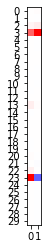

Indices of features with largest variance
[23  3 13 22  2 21 20  1  0 12 11 10 26 25  6 27 28  5  7 16  8 24 29 15
  4 18  9 17 14 19]


In [18]:
# plot the component weights - only two features get any weight. 
max_val = np.abs(non_normalized_model.components_[:2, :]).max()
plt.figure(figsize=[2, 4])
plt.imshow(non_normalized_model.components_[:2, :].transpose(), 
           cmap='bwr', 
           clim=[-max_val, max_val])
plt.yticks(range(30))
plt.show()


# print out the indices of the features with the largest variance - same as the ones the PCs load on. 
print("Indices of features with largest variance")
print(np.argsort(non_normalized_X.std(axis=0))[::-1]) 


## Many other types of dimensionality reduction and clustering algorithms as well! 

k-means is not the only clustering algorithm, and PCA is not the only dimensionality reduction algorithm. [Here's](https://scikit-learn.org/stable/modules/clustering.html) a nice visualization of other clustering algorithms; the table below is also useful, which summarizes some of the things we care about when choosing a clustering algorithm. (It is generally pretty easy with sklearn to run multiple clustering algorithms, so you can try a couple and see which performs best on your data. Of course, it can be hard to define best, but you may have some sense of which results are most intuitive.)

Similarly, while PCA assumes that the data can be well-modeled by a plane (or hyperplane) there are also many methods which don't make this assumption! This nice [demo](https://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py) illustrates some of them.

LLE: 0.1 sec
LTSA: 0.19 sec
Hessian LLE: 0.26 sec
Modified LLE: 0.21 sec
Isomap: 0.34 sec
MDS: 1.7 sec
SE: 0.1 sec
t-SNE: 3.5 sec


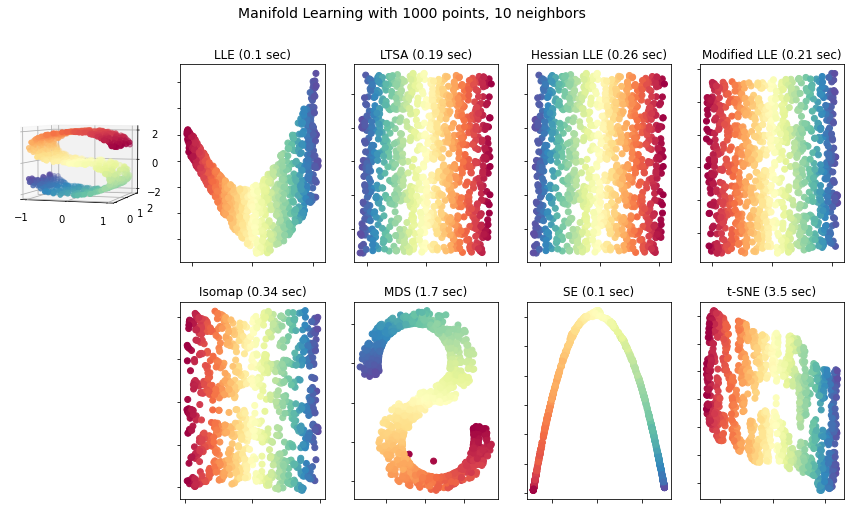

In [19]:
# Author: Jake Vanderplas -- <vanderplas@astro.washington.edu>

from collections import OrderedDict
from functools import partial
from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

# Create figure
fig = plt.figure(figsize=(15, 8))
fig.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

# Add 3d scatter plot
ax = fig.add_subplot(251, projection="3d")
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

# Set-up manifold methods
LLE = partial(
    manifold.LocallyLinearEmbedding,
    n_neighbors=n_neighbors,
    n_components=n_components,
    eigen_solver="auto",
)

methods = OrderedDict()
methods["LLE"] = LLE(method="standard")
methods["LTSA"] = LLE(method="ltsa")
methods["Hessian LLE"] = LLE(method="hessian")
methods["Modified LLE"] = LLE(method="modified")
methods["Isomap"] = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components)
methods["MDS"] = manifold.MDS(n_components, max_iter=100, n_init=1)
methods["SE"] = manifold.SpectralEmbedding(
    n_components=n_components, n_neighbors=n_neighbors
)
methods["t-SNE"] = manifold.TSNE(n_components=n_components, init="pca", random_state=0)

# Plot results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 5, 2 + i + (i > 3))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

plt.show()

There are also unsupervised learning tasks beyond dimensionality reduction or clustering. For example, GANs (generative adversarial networks) are deep learning models which seek to learn a distribution and generate samples from it by simultaneously training a discriminator and a generator. [Here's](https://poloclub.github.io/ganlab/) an illustration of how this works, and [here's](https://www.nytimes.com/interactive/2020/11/21/science/artificial-intelligence-fake-people-faces.html) an illustration of how terrifyingly realistic the samples from a GAN can look.